# Libraries and Data Information

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

### The data set includes information about:

- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 

- The dataset has been taken from Canada Government official open data website. This is a compiled version.

- This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

### Feature Information

**Make:** Vehicle brand

**Model:** Vehicle model
- 4WD/4X4 = Four-wheel drive

- AWD = All-wheel drive

- FFV = Flexible-fuel vehicle

- SWB = Short wheelbase

- LWB = Long wheelbase

- EWB = Extended wheelbase


**Vehicle Class:** Vehicle class (e.g. small car, sports car, van, etc.)

**Engine Size (L):** Vehicle engine displacement (in liters)

**Cylinders:** Number of vehicle cylinders

**Transmission:** Vehicle gearbox type (manual or automatic)
- A = Automatic

- AM = Automated manual

- AS = Automatic with select shift

- AV = Continuously variable

- M = Manual

- 3 - 10 = Number of gears

**Fuel Type:** Type of fuel used (e.g. gasoline, diesel, hybrid, etc.)
- X = Regular gasoline

- Z = Premium gasoline

- D = Diesel

- E = Ethanol (E85)

- N = Natural gas

**Fuel Consumption City (L/100 km):** Fuel consumption city (liters/100 km)

**Fuel Consumption Hwy (L/100 km):** Hwy fuel consumption (liters/100 km)

**Fuel Consumption Comb (L/100 km):** Average fuel consumption (liters/100 km)

**Fuel Consumption Comb (mpg):** Fuel economy (miles per gallon)
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions (g/km):** CO2 emissions per vehicle (grams/kilometer)

# Read and Check Data

In [2]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

In [5]:
# let's check our missing values
df.isnull().sum()

make                 0
model                0
vehicle_class        0
engine_size          0
cylinders            0
transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

In [6]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [8]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


- The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [9]:
df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


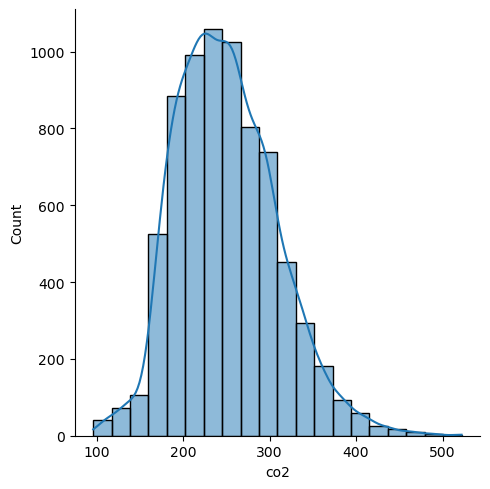

In [10]:
sns.displot(data = df, x = "co2", kde = True, bins = 20)
plt.show()

# Simple Lineer Regression

## Train-Test Split

In [11]:
X = df[["engine_size"]]
y = df["co2"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(5908, 1)
(1477, 1)
(5908,)
(1477,)


## Manuel Lineer Regresyon

In [15]:
np.polyfit(X_train.engine_size, y_train, deg = 1)

array([ 36.70483532, 134.57376563])

In [16]:
# y = b1 * X + b0

In [17]:
b1, b0 = np.polyfit(X_train.engine_size, y_train, deg = 1)

In [18]:
print("b1        :", b1)
print("b0        :", b0)

b1        : 36.704835315985
b0        : 134.57376563227712


In [19]:
y_pred_test = b1 * X_test + b0
y_pred_test

,engine_size
6307,244.688272
5036,207.983436
1995,274.052140
4156,226.335854
6328,244.688272
...,...
1632,340.120843
4640,266.711173
4021,226.335854
660,226.335854


In [20]:
y_pred_train = b1 * X_train + b0
y_pred_train

,engine_size
1095,207.983436
3538,329.109393
2377,226.335854
3414,296.075041
880,259.370206
...,...
4931,207.983436
3264,200.642469
1653,318.097942
2607,263.040689


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance: ")   
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764512
MAE 		: 23.025089125242282
MSE 		: 912.8346430153166
RMSE 		: 30.213153476843768


In [23]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.34703683009361
MSE 		: 950.9184766753834
RMSE 		: 30.83696607442735


## LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
lin_reg.coef_      # b1

array([36.70483532])

In [27]:
lin_reg.intercept_ # b0

134.5737656322779

In [28]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

array([244.68827158, 207.98343626, 274.05213983, ..., 226.33585392,
       226.33585392, 226.33585392])

In [29]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([207.98343626, 329.10939281, 226.33585392, ..., 318.09794221,
       263.04068924, 207.98343626])

In [30]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    

In [31]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764516
MAE 		: 23.025089125242342
MSE 		: 912.8346430153156
RMSE 		: 30.21315347684375


In [32]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.347036830093717
MSE 		: 950.9184766753833
RMSE 		: 30.836966074427348


In [33]:
# MAE ile RMSE arasındaki fark outlier etkisini gösterir

In [34]:
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
6307,241,244.688272,-3.688272
5036,229,207.983436,21.016564
1995,253,274.052140,-21.052140
4156,183,226.335854,-43.335854
6328,231,244.688272,-13.688272
1696,195,222.665370,-27.665370
4313,301,263.040689,37.959311
5685,277,266.711173,10.288827
4902,201,193.301502,7.698498
6873,280,233.676821,46.323179


In [35]:
from yellowbrick.regressor import ResidualsPlot

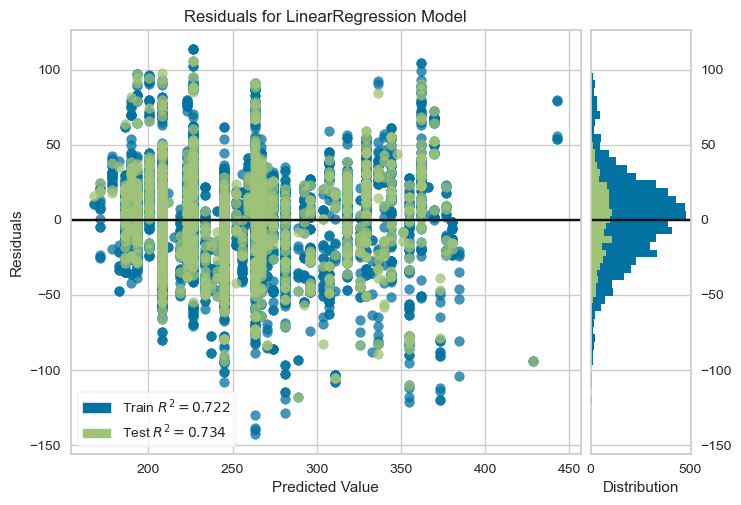

In [36]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [37]:
from yellowbrick.regressor import PredictionError

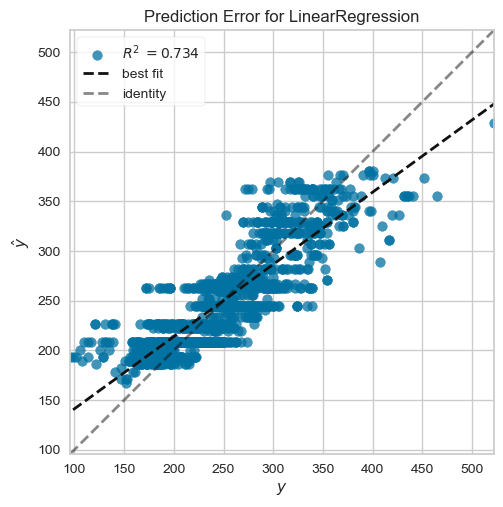

In [38]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Multiple Lineer Regression

## Train-Test Split

In [39]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [67]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape: (1477, 4)
y Test features shape: (1477,)


## Multiple Lineer Regresyon

In [70]:
multi_lin_reg = LinearRegression()

In [71]:
multi_lin_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = multi_lin_reg.predict(X_test)
y_train_pred = multi_lin_reg.predict(X_train)

In [73]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [74]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.903380,0.900396
mae,11.427166,11.676076
mse,330.301688,342.600757
rmse,18.174204,18.509478


## Polynomial Regresyon

In [75]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) ## For döngüsü döndükçe degreemiz artıyor,
        poly_features = polynomial_converter.fit_transform(X)                        # bundan dolayı feature sayımız artıyor.
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [76]:
poly(8)

,train_rmse_errors,test_rmse_errors,number of features
1,18.314047,18.087420,4
2,15.788285,15.680230,14
3,14.314294,13.914205,34
4,12.916365,12.699119,69
5,12.093932,12.490834,125
6,11.139236,13.458671,209
7,19.939600,116.936103,329


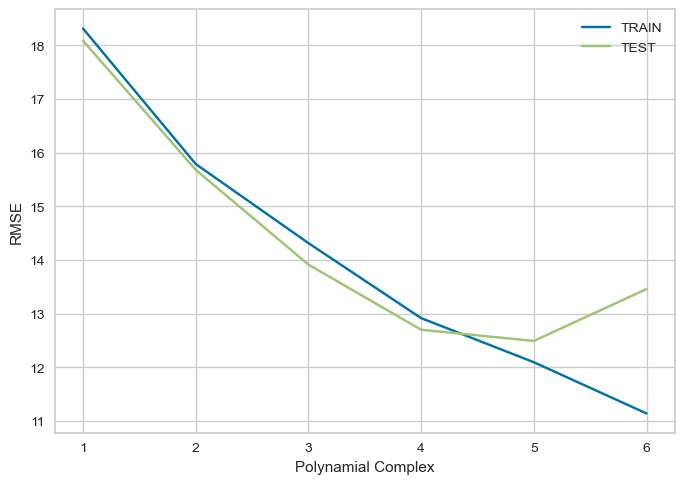

In [77]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [78]:
poly_converter = PolynomialFeatures(degree = 4, include_bias=False)

In [79]:
poly_lin_reg = LinearRegression()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [82]:
poly_lin_reg.fit(X_train, y_train)

LinearRegression()

In [83]:
y_train_pred = poly_lin_reg.predict(X_train)
y_pred = poly_lin_reg.predict(X_test)

In [84]:
poly_multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "poly")
poly_multiple_linear

,poly_train,poly_test
R2,0.953385,0.947646
mae,6.042713,6.426362
mse,159.355150,180.078847
rmse,12.623595,13.419346


In [85]:
result = pd.concat([multiple_linear, poly_multiple_linear], axis=1)
result

,multi_train,multi_test,poly_train,poly_test
R2,0.903380,0.900396,0.953385,0.947646
mae,11.427166,11.676076,6.042713,6.426362
mse,330.301688,342.600757,159.355150,180.078847
rmse,18.174204,18.509478,12.623595,13.419346


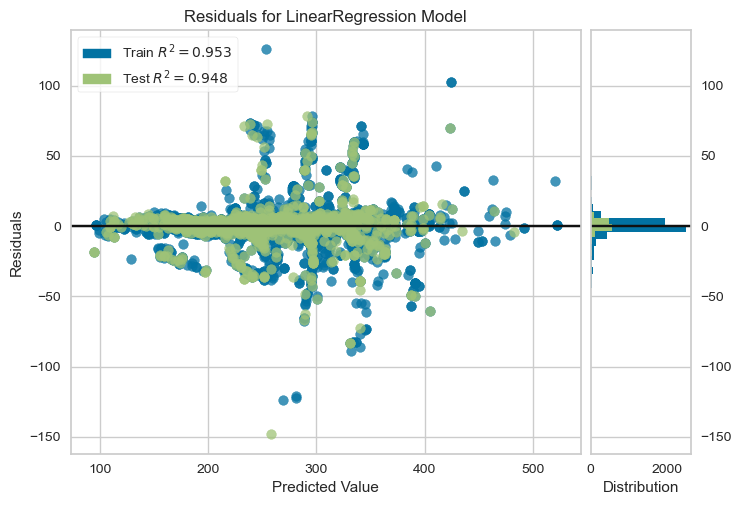

In [58]:
poly_lin_reg = LinearRegression()
visualizer = ResidualsPlot(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

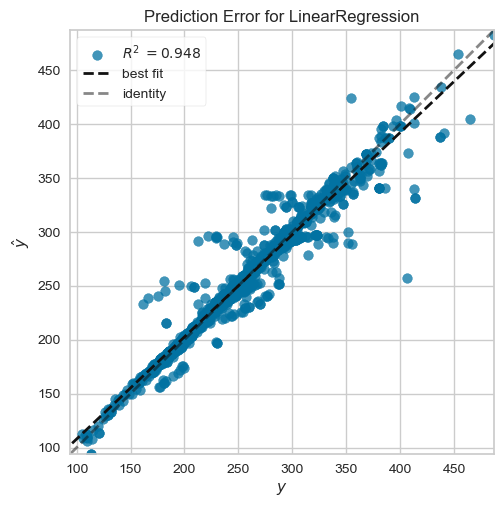

In [59]:
poly_lin_reg = LinearRegression()
visualizer = PredictionError(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## StandardScaler

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [97]:
X_train.shape # fit de ogreniyor. 

(5908, 69)

In [98]:
scaler.fit(X_train)

StandardScaler()

In [99]:
X_train_scaled = scaler.transform(X_train) # uyguluyor. min=0 , max = 1 yapiyor. aradakileride dagitiyor. 
X_train_scaled 

array([[-0.12149345,  0.20534188, -0.37681659, ...,  1.49112427,
         0.11090642, -0.1077625 ],
       [ 0.6141664 ,  0.20534188,  0.59257065, ..., -0.88383211,
        -0.7146818 , -0.4535469 ],
       [-0.12149345,  0.20534188,  0.24636092, ..., -0.45682398,
        -0.50862809, -0.38225914],
       ...,
       [ 0.24633648,  0.20534188, -0.20371173, ..., -0.45682398,
        -0.17471027, -0.2363027 ],
       [-0.48932338, -0.88513888, -0.82688924, ...,  0.46538028,
         0.6363709 ,  0.24212651],
       [ 0.6141664 ,  1.29582264,  0.31560287, ...,  1.02340697,
        -0.48713916, -0.38225914]])

*** Not: Train datasi icin hem fit hem transform uygularken "test" datasi icin dsadece transform uyguluyoruz. 

In [100]:
X_test_scaled = scaler.transform(X_test) # train datasinda fit ile ogrendigi scale etme olayini test datasina uyguluyor. 
X_test_scaled 

array([[-0.12149345,  0.20534188, -0.03060686, ...,  0.34185348,
        -0.27672051, -0.29073711],
       [ 0.90843035,  1.29582264,  1.2849901 , ..., -0.91425102,
        -0.98206772, -0.52952408],
       [ 2.23261809,  1.29582264,  1.04264329, ..., -0.70108997,
        -0.89522984, -0.50782853],
       ...,
       [-1.29854922, -0.88513888, -1.10385702, ..., -0.45682398,
         1.06274987,  0.60302082],
       [ 0.24633648,  0.20534188, -0.27295367, ...,  1.02340697,
        -0.02542564, -0.17547199],
       [-0.85715331, -0.88513888, -0.96537313, ..., -1.06618224,
         0.73923453,  0.35208087]])

## Ridge Regression

In [101]:
from sklearn.linear_model import Ridge

In [102]:
ridge_model = Ridge(alpha=1, random_state=42)

In [103]:
ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train fit ederiz

Ridge(alpha=1, random_state=42)

In [104]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [105]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.936997,0.927938
mae,7.652171,8.404607
mse,215.378640,247.865625
rmse,14.675784,15.743749


In [106]:
result_2 = pd.concat([result, rs], axis=1)
result_2

,multi_train,multi_test,poly_train,poly_test,ridge_train,ridge_test
R2,0.903380,0.900396,0.953385,0.947646,0.936997,0.927938
mae,11.427166,11.676076,6.042713,6.426362,7.652171,8.404607
mse,330.301688,342.600757,159.355150,180.078847,215.378640,247.865625
rmse,18.174204,18.509478,12.623595,13.419346,14.675784,15.743749


In [107]:
from sklearn.linear_model import Lasso, LassoCV

In [108]:
lasso_model = Lasso(alpha = 1, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [109]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [110]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.908211,0.903149
mae,11.471661,11.815889
mse,313.786812,333.132733
rmse,17.714029,18.251924


In [111]:
lasso_model.coef_  # Lasso modelinin katsayılarını alın

array([  0.        ,   0.        ,   0.        , -31.55638666,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  15.41126594,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   3.90259382,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         4.32641728,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   3.53742748,  -0.        ,   0.  

In [112]:
nonzero_features = np.count_nonzero(lasso_model.coef_) 

In [113]:
nonzero_features

6

In [114]:
ridge_model.coef_

array([ 23.53473428,  21.81177982,  36.25291809, -48.15273428,
         9.39307922, -20.15183773, -11.79747111,  -8.44492693,
        22.84914613,  21.2414396 , -45.89679452, -46.50500418,
         1.95549588,  24.56310834,  11.56138468,  -8.88385905,
        11.4720219 ,   2.99571656,  -2.67187074, -29.493438  ,
       -25.92919119, -55.00731808,  32.57263267, -18.88823925,
        18.03713269,  28.127431  , -10.13832476, -18.82012788,
        35.17502176,  13.39583867, -61.73947536,  28.46289379,
       -44.73051695,  41.32117708, -30.79311154,  -8.82004599,
        66.1051035 , -15.66256156,   2.90007861,   2.8575353 ,
       -13.17019181,  42.10532967,  14.22162041,   6.11491563,
        -1.01654173, -10.0296938 ,  -6.06762709, -32.36687191,
       -13.02702283,   1.04328498, -11.22597825, -12.41801011,
        12.9786839 ,  10.68898143, -26.69883855,  14.5411835 ,
        -7.14864989,  12.55756406,  31.16072789,   9.71332932,
        -2.45418754,  22.74877625, -16.18768069,  40.42